In [24]:
import numpy as np
import pandas as pd
from skimage.io import imread,imsave, imshow
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [25]:
from pathlib import Path

In [26]:
def rle_decode(mask_rle,shape=(1400,2100)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
        
    return img.reshape(shape,order='F')

In [27]:
def rle_encode(msk):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = msk.flatten(order='F')
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    rle = ' '.join(str(x) for x in runs)
    return rle

In [28]:
import os

In [29]:
lbls_fish = Path('../preds/fish')
lbls_flow = Path('../preds/flow')
lbls_grav = Path('../preds/grav')
lbls_sug = Path('../preds/sug')

In [30]:
msk_fls_fish = [f for f in lbls_fish.iterdir() if f.is_file()]
msk_fls_flow = [f for f in lbls_flow.iterdir() if f.is_file()]
msk_fls_grav = [f for f in lbls_grav.iterdir() if f.is_file()]
msk_fls_sug  = [f for f in lbls_sug.iterdir() if f.is_file()]

In [31]:
msk_fls_fish[7]

PosixPath('../preds/fish/4551171.png')

In [32]:
len(msk_fls_fish)

3698

In [33]:
_ = imread('../preds/fish/4551171.png')

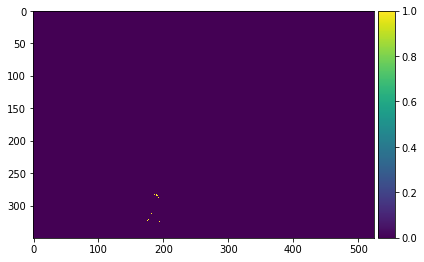

In [34]:
imshow(_)

In [35]:
np.unique(_)

Array([0, 1], dtype=uint8)

In [36]:
enc = rle_encode(_)

In [37]:
_ = rle_decode(enc,(1400//4,2100//4))

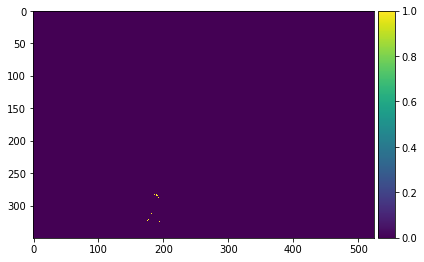

In [38]:
imshow(_.reshape((1400//4,2100//4),order='F'))

In [39]:
np.unique(_)

array([0, 1], dtype=uint8)

## conervert masks to rle

In [40]:
fls = [f.name for f in lbls_fish.iterdir() if f.is_file()]

In [41]:
fls[:3]

['81249d7.png', 'fda8a78.png', '575c4b6.png']

In [42]:
ss = pd.read_csv('../sample_submission.csv',index_col='Image_Label')

In [43]:
ss.head(6)

,EncodedPixels
Image_Label,
002f507.jpg_Fish,1 1
002f507.jpg_Flower,1 1
002f507.jpg_Gravel,1 1
002f507.jpg_Sugar,1 1
0035ae9.jpg_Fish,1 1
0035ae9.jpg_Flower,1 1


In [44]:
sse = ss.copy(deep=True)

In [45]:
pths = [lbls_fish,lbls_flow,lbls_grav,lbls_sug]

In [46]:
classes = ['Fish','Flower','Gravel','Sugar']

In [47]:
for a in tqdm(ss.index[::4]):
    msk_nm = a.split('_')[0][:-4]
    for i in range(4):
        msk = imread(pths[i]/(msk_nm+'.png'))
        enc = rle_encode(msk)
        if enc == '':
            sse.loc[msk_nm+".jpg_"+classes[i],'EncodedPixels'] = np.NaN
        else:
            sse.loc[msk_nm+".jpg_"+classes[i],'EncodedPixels'] =  enc

In [48]:
sse.head(6)

,EncodedPixels
Image_Label,
002f507.jpg_Fish,NaN
002f507.jpg_Flower,NaN
002f507.jpg_Gravel,1 1 3 60546 60551 348 60901 344 61246 1 61251 ...
002f507.jpg_Sugar,NaN
0035ae9.jpg_Fish,NaN
0035ae9.jpg_Flower,NaN


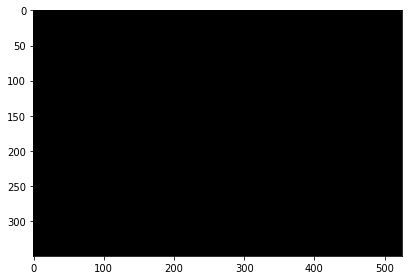

In [49]:
imshow(imread(lbls_flow/'002f507.png'))

In [50]:
_1 = sse.iloc[0::4];
_2 = sse.iloc[1::4];
_3 = sse.iloc[2::4];
_4 = sse.iloc[3::4] 

In [51]:
len(_1[_1.EncodedPixels!='1 0']),len(_2[_2.EncodedPixels!='1 0']),len(_3[_3.EncodedPixels!='1 0']),len(_4[_4.EncodedPixels!='1 0'])

(3698, 3698, 3698, 3698)

In [52]:
sse.to_csv('../sub1.csv')

In [53]:
ss = pd.read_csv('../sub1.csv')

In [54]:
ss.head(2)

,Image_Label,EncodedPixels
0,002f507.jpg_Fish,NaN
1,002f507.jpg_Flower,NaN


In [71]:
ss.loc[ss.EncodedPixels == '1 0',ss.columns[1]] = '1 1'

In [72]:
samsu = pd.read_csv('sample_submission.csv')

In [73]:
samsu.head(2)

,ImageId_ClassId,EncodedPixels
0,004f40c73.jpg_1,1 1
1,004f40c73.jpg_2,1 1


In [14]:
a = np.random.randint(0,4,(4,3))

In [15]:
a

array([[0, 1, 2],
       [2, 2, 0],
       [0, 3, 0],
       [3, 3, 1]])

In [17]:
a.flatten(order='F')

array([0, 2, 0, 3, 1, 2, 3, 3, 2, 0, 0, 1])

In [39]:
sse.index[:7]

Index(['004f40c73.jpg_1', '004f40c73.jpg_2', '004f40c73.jpg_3',
       '004f40c73.jpg_4', '006f39c41.jpg_1', '006f39c41.jpg_2',
       '006f39c41.jpg_3'],
      dtype='object', name='ImageId_ClassId')

In [40]:
samp = pd.read_csv('sample_submission.csv',index_col='ImageId_ClassId')

In [41]:
samp.index[:7]

Index(['004f40c73.jpg_1', '004f40c73.jpg_2', '004f40c73.jpg_3',
       '004f40c73.jpg_4', '006f39c41.jpg_1', '006f39c41.jpg_2',
       '006f39c41.jpg_3'],
      dtype='object', name='ImageId_ClassId')

In [46]:
_ = sse.index.values == samp.index.values

In [47]:
_.sum()/len(_)

1.0